In [1]:
%matplotlib inline

In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import muon
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=1000)
                         
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [3]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/EDA"

In [4]:
not_endocrine_celltypes = ["Mat. Acinar", "Imm. Acinar", "Prlf. Ductal", "Ductal", "Ngn3 high cycling"]

In [5]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#42f5ec', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
      'Ngn3 high cycling': '#adf542',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}


In [6]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")

/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


In [7]:
mudata.obs["cell_type_refined"] = mudata.obs["cell_type_refined"].astype("category")
mudata.uns["cell_type_refined_colors"] = [color_dict[ct] for ct in mudata.obs["cell_type_refined"].cat.categories]


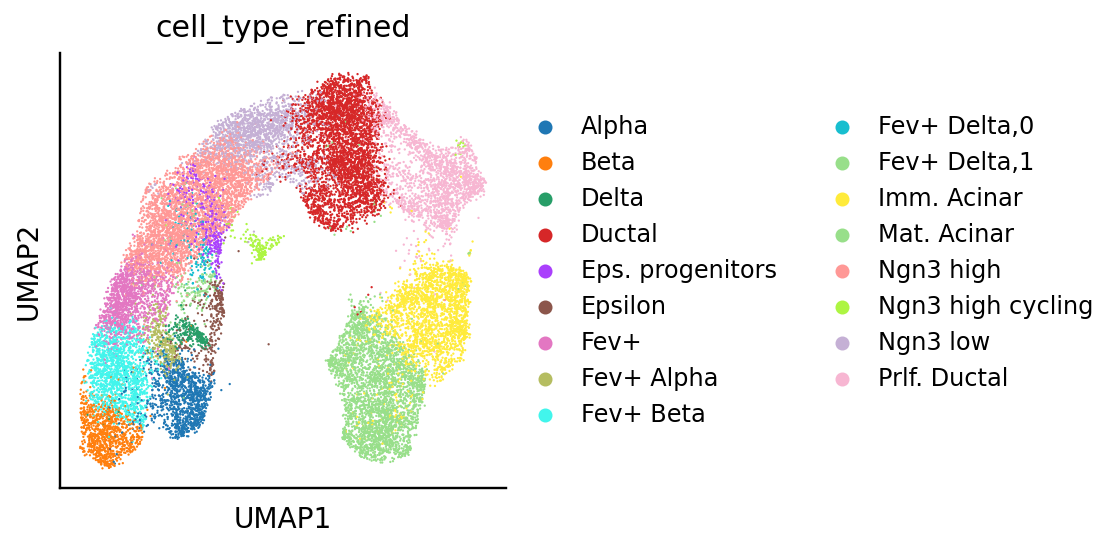

In [8]:
fig = sc.pl.umap(mudata, color="cell_type_refined", return_fig=True)

In [9]:
fig.savefig(os.path.join(output_dir, 'endocrine_refinement_full.png'), dpi=1000)

In [10]:
mudata = mudata[~mudata.obs["cell_type"].isin(not_endocrine_celltypes)].copy()

/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


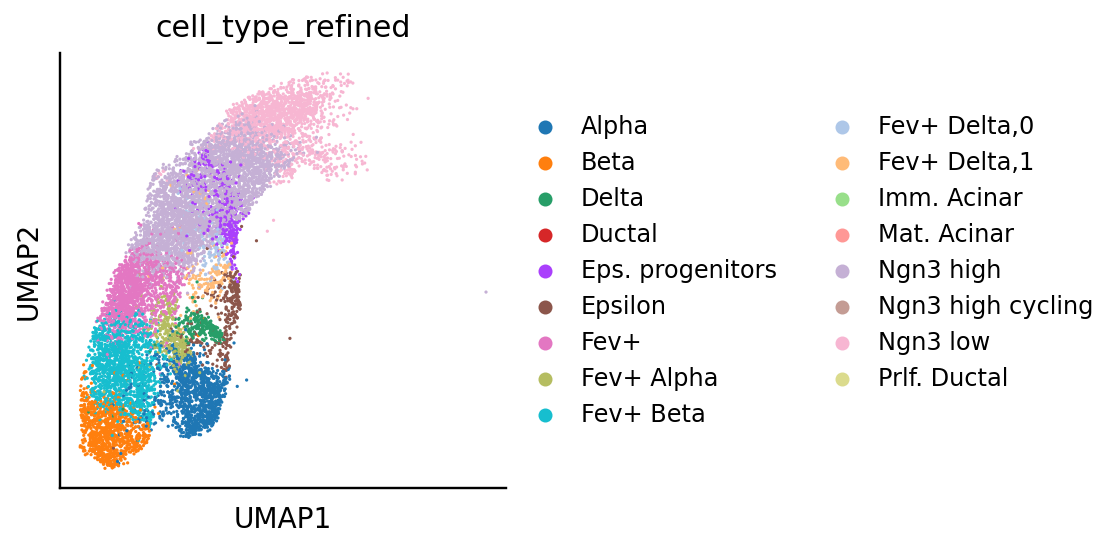

In [11]:
fig = sc.pl.umap(mudata, color="cell_type_refined", return_fig=True)

In [12]:
fig.savefig(os.path.join(output_dir, 'endocrine_refinement_reduced.png'))